In [6]:
install.packages("Lahman") #install package

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
install.packages("data.table") #install package

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [8]:
library("Lahman") #loads package 

In [9]:
library("data.table") #loads package


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [10]:
teams = as.data.table(Teams) #Use data.table to build new data set with teamID, Rank, W, etc. 
#also create WinPercentage formula

In [11]:
teams = teams[, .(yearID, 
                  lgID = as.character(lgID), 
                  teamID = as.character(teamID), 
                  franchID = as.character(franchID),
                  Rank, G, W, L, R, ERA, SO, 
                  WinPercent = W/(W+L))]

In [12]:
salaries = as.data.table(Salaries) #create salaries data set 

In [13]:
salaries = salaries[, c("lgID", "teamID", "salary1M") := 
                      list(as.character(lgID), as.character(teamID), salary / 1e6L)]

In [14]:
payroll = salaries[, .(payroll = sum(salary1M)), by=.(teamID, yearID)]

In [15]:
teamPayroll = merge(teams, payroll, by=c("teamID","yearID")) #merge teams and payroll data sets together

In [16]:
head(teamPayroll) #all payroll data

teamID,yearID,lgID,franchID,Rank,G,W,L,R,ERA,SO,WinPercent,payroll
ANA,1997,AL,ANA,2,162,84,78,829,4.52,953,0.5185185,31.13547
ANA,1998,AL,ANA,2,162,85,77,787,4.49,1028,0.5246914,41.28100
ANA,1999,AL,ANA,4,162,70,92,711,4.79,1022,0.4320988,55.38817
ANA,2000,AL,ANA,3,162,82,80,864,5.00,1024,0.5061728,51.46417
ANA,2001,AL,ANA,3,162,75,87,691,4.20,1001,0.4629630,47.53517
ANA,2002,AL,ANA,2,162,99,63,851,3.69,805,0.6111111,61.72167


In [17]:
teamPayrollP <- teamPayroll[yearID >= "2000"] #removes data with any year earlier than 2000

In [34]:
head(teamPayrollP)

teamID,yearID,lgID,franchID,Rank,G,W,L,R,ERA,SO,WinPercent,payroll
ANA,2000,AL,ANA,3,162,82,80,864,5.00,1024,0.5061728,51.46417
ANA,2001,AL,ANA,3,162,75,87,691,4.20,1001,0.4629630,47.53517
ANA,2002,AL,ANA,2,162,99,63,851,3.69,805,0.6111111,61.72167
ANA,2003,AL,ANA,3,162,77,85,736,4.28,838,0.4753086,79.03167
ANA,2004,AL,ANA,1,162,92,70,836,4.28,942,0.5679012,100.53467
ARI,2000,NL,ARI,3,162,85,77,792,4.35,975,0.5246914,81.02783


In [35]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [18]:
library("ggplot2") #load ggplot2 package

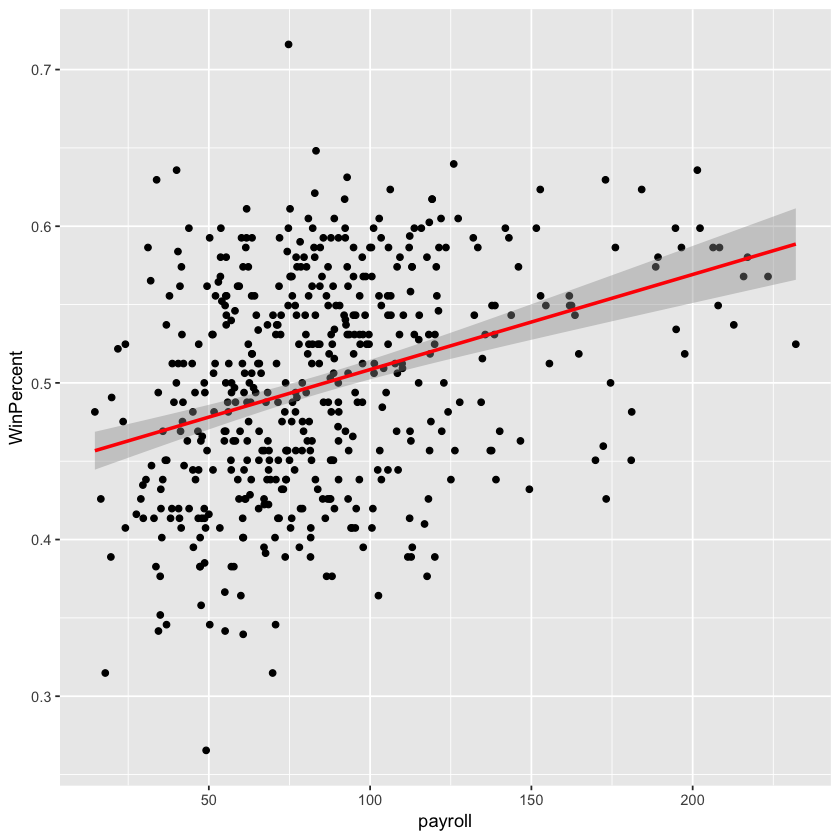

In [19]:
ggplot(teamPayrollP, #linear regression graph of payroll and winpercentage
       aes(x= payroll, y = WinPercent)) +geom_point() + stat_smooth(method = "lm", col = "red")

In [1]:
install.packages('ggplot2',repos='https://mirrors.tuna.tsinghua.edu.cn/CRAN/')
library('ggplot2')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
install.packages("dplyr") #install dplyr package
library('dplyr')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [30]:
teams1 = teams[, .(yearID, 
                  lgID = as.character(lgID), 
                  teamID = as.character(teamID), 
                  W, L, R, RA, 
                  WPCT= R^1.83/(R^1.83+RA^1.83))] #winning percentage; ratio of runs to the total number of runs; runs+runs allowed

In [31]:
exwin=round(teams1$WPCT*(teams1$W+teams$L)) #exoected number of wins formula

In [32]:
diff= teams1$W-exwin  #difference between Wins and expected number of wins

In [33]:
teams2 = teams[, .(yearID, 
                  lgID = as.character(lgID), 
                  teamID = as.character(teamID), 
                  W, L, R, RA, 
                  WPCT= R^1.83/(R^1.83+RA^1.83), exwin, diff)]

In [34]:
head(teams2)

yearID,lgID,teamID,W,L,R,RA,WPCT,exwin,diff
1871,NA,BS1,20,10,401,303,0.6254669,19,1
1871,NA,CH1,19,9,302,241,0.6017838,17,2
1871,NA,CL1,10,19,249,341,0.3599903,10,0
1871,NA,FW1,7,12,137,243,0.2594676,5,2
1871,NA,NY2,16,17,302,313,0.4836382,16,0
1871,NA,PH1,21,7,376,266,0.6532487,18,3


In [35]:
modelexwin= ggplot(teams2, aes(x= exwin, y = W))+geom_point() 
            + stat_smooth(method = "lm", col = "blue") #plot of predicted expected wins in relations to previous wins
                                                        #utilizing runs / runs+allowed runs, which is a ratio based 
                                                        #on the pythagorean theory of chance

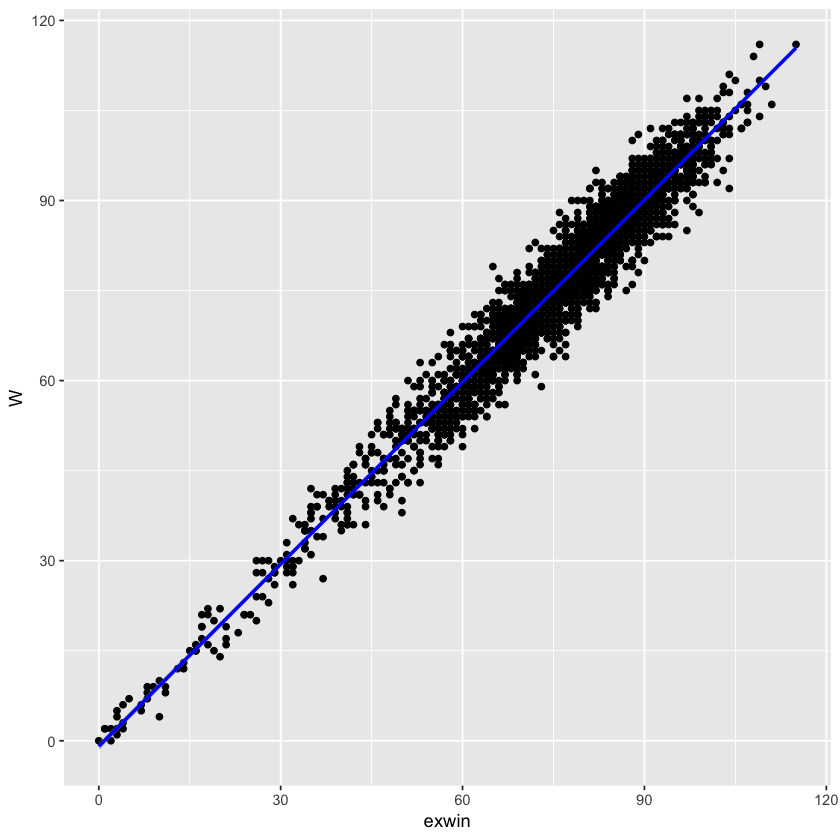

In [36]:
modelexwin

In [37]:
modelew= lm(W ~ exwin, data=teams2)

In [38]:
summary(modelew) #strong model that predicts wins as R-square is .9488 


Call:
lm(formula = W ~ exwin, data = teams2)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9157  -2.8341   0.0144   2.9048  14.1775 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.934993   0.339036  -2.758  0.00586 ** 
exwin        1.011653   0.004416 229.067  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.982 on 2833 degrees of freedom
Multiple R-squared:  0.9488,	Adjusted R-squared:  0.9488 
F-statistic: 5.247e+04 on 1 and 2833 DF,  p-value: < 2.2e-16
